# 🏦 Optimizing Retail Banking Strategies  
### Through RFM-Based Customer Segmentation

---

Welcome to the RFM Segmentation notebook for **BankTrust**, where we’ll use Recency-Frequency-Monetary analysis and clustering to unlock customer insights and drive smarter, more personalized banking strategies.

## What is RFM Analysis?

**RFM analysis** is a proven marketing and customer‐segmentation technique that categorizes customers by three key behavioral metrics:
- **Recency (R):**  
  How recently did the customer make a purchase or interact with the business?  
  > Customers who purchased more recently are typically more engaged and more likely to respond to new offers.

- **Frequency (F):**  
  How often does the customer make purchases or engage with the business within a given time frame?  
  > High‐frequency customers tend to be more loyal and have stronger brand affinity.

- **Monetary Value (M):**  
  How much money has the customer spent in total?  
  > Customers with higher spending levels often represent your most valuable revenue sources.

By scoring each customer on Recency, Frequency and Monetary, you can segment your base into groups such as “Champions,” “At-Risk,” or “Big Spenders,” and then tailor marketing or retention strategies accordingly.


**Why this matters**  
- **Retention over acquisition**: It costs 5× more to win a new customer than to keep an existing one.  
- **Personalized engagement**: Different customers have different habits—targeted offers beat “spray-and-pray” marketing every time.  
- **ROI-driven campaigns**: Focus budgets on the segments with the greatest potential lift.

**What you’ll see in this notebook**  
1. **Data loading & cleaning**  
2. **Feature engineering**: computing R, F & M values  
3. **Scoring & segmentation**: turning raw metrics into human-readable groups  
4. **Unsupervised clustering**: uncovering natural customer archetypes  
5. **Segment profiling & visualization**  
6. **Actionable recommendations**  

**Tech stack**  
- **Pandas & NumPy** for data wrangling  
- **Matplotlib & Seaborn** for rich visual exploration  
- **scikit-learn** for standardization and K-Means clustering  

_Let’s dive in and discover how BankTrust can better understand its customers, reduce churn, and maximize lifetime value!_  

-----------------------------------------------------------------------------

## Import Libraries

Below we load all the Python libraries we’ll need for data manipulation, visualization, and date handling. We also set up inline plotting and suppress any unnecessary warnings.

In [1]:
import numpy as np                # numerical operations
import pandas as pd               # data manipulation
import matplotlib.pyplot as plt   # plotting
import seaborn as sns             # statistical graphics
import datetime as dt             # date/time utilities
import warnings                   # warning control

# Notebook configuration
%matplotlib inline
# sns.set(style='whitegrid', palette='muted')
warnings.filterwarnings('ignore')


## Load Our Dataset

We read the transaction data from the CSV file into a pandas DataFrame.  
Ensure that the file path is correct relative to your notebook location.

In [2]:
data_path = "../data/bank_data_C.csv"
df = pd.read_csv(data_path)
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Loaded 1041614 rows and 9 columns.


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## Dataset Overview

Before diving into data cleaning and feature engineering, it's always a good idea to get a high-level summary of our raw data.  
Below, we use `df.describe(include="all")` to see counts, unique values, top frequencies, and basic statistics for every column in our dataset.

In [3]:
df.describe(include = "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


| Column                   | count     | unique | top        | freq   | mean         | std          | min       | 25%        | 50%        | 75%         | max          |
|--------------------------|-----------|--------|------------|--------|--------------|--------------|-----------|------------|------------|-------------|--------------|
| **TransactionID**        | 1,041,614 | 1,041,614 | T1         | 1      | —            | —            | —         | —          | —          | —           | —            |
| **CustomerID**           | 1,041,614 | 879,358 | C5533885   | 6      | —            | —            | —         | —          | —          | —           | —            |
| **CustomerDOB**          | 1,041,614 | 17,233  | 1/1/1800   | 56,292 | —            | —            | —         | —          | —          | —           | —            |
| **CustGender**           | 1,041,614 | 3       | M          | 760,978| —            | —            | —         | —          | —          | —           | —            |
| **CustLocation**         | 1,041,614 | 9,275   | MUMBAI     | 101,997| —            | —            | —         | —          | —          | —           | —            |
| **CustAccountBalance**   | 1,041,614 | —       | —          | —      | 114,998.6    | 846,760.9    | 0.0       | 4,728.14   | 16,768.52  | 57,428.85   | 115,035,533.8|
| **TransactionDate**      | 1,041,614 | 55      | 7/8/16     | 27,084 | —            | —            | —         | —          | —          | —           | —            |
| **TransactionTime**      | 1,041,614 | —       | —          | —      | 157,122.1    | 51,263.5     | 0.0       | 124,041.0  | 164,247.0  | 200,022.0   | 235,959.0    |
| **TransactionAmount (INR)** | 1,041,614 | —    | —          | —      | 1,566.10     | 6,561.46     | 0.0       | 160.0      | 457.50     | 1,200.0     | 1,560,035.0  |

> **Notes:**
> - `TransactionID` and `CustomerID` are all unique identifiers.
> - There are 55 unique transaction dates, with the most common being **7/8/16**.
> - Gender has 3 categories (e.g., “M”, “F”, and possibly missing/other).
> - Account balances range from 0 up to over 115 million INR.
> - Transaction times are Unix-like integers—these will need parsing into proper timestamps.
> - Transaction amounts vary widely, from 0 up to around 1.56 million INR.
> 
> We can already spot some potential issues to address:
> 1. **Invalid dates** (e.g. `1/1/1800`) in `CustomerDOB` will need correction.
> 2. **Unix timestamps** in `TransactionTime` must be combined with dates.
> 3. Outliers in age and monetary amounts will require filtering.

In [4]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

### Data Types Overview

Below is the output of `df.dtypes` and a brief assessment of each field:

| Column                    | dtype    | Notes & Next Steps                                                                                         |
|---------------------------|----------|-----------------------------------------------------------------------------------------------------------|
| **TransactionID**         | object   | Unique transaction identifier. Keep as string (object).                                                   |
| **CustomerID**            | object   | Unique customer identifier. Keep as string (object).                                                      |
| **CustomerDOB**           | object   | Currently a string. Needs conversion to `datetime` so we can compute age and date-based metrics.          |
| **CustGender**            | object   | Categorical (e.g. “M”/“F”). Consider casting to `category` dtype for efficiency.                          |
| **CustLocation**          | object   | Categorical (e.g. city names). Can be left as object or converted to `category`.                          |
| **CustAccountBalance**    | float64  | Numeric — ready for analysis.                                                                             |
| **TransactionDate**       | object   | Currently a string. Needs conversion to `datetime` so we can calculate recency and time series trends.   |
| **TransactionTime**       | int64    | Raw time value (e.g. `143207` for 14:32:07). Should be zero-padded and parsed into a proper `time` type. |
| **TransactionAmount (INR)** | float64 | Numeric transaction amount — ready for summary statistics and RFM calculations.                           |

#### Next Steps

1. **Parse Dates**  
   ```python
   df['CustomerDOB']      = pd.to_datetime(df['CustomerDOB'],      dayfirst=True, errors='coerce')
   df['TransactionDate']  = pd.to_datetime(df['TransactionDate'],  dayfirst=True, errors='coerce')


### Data Parsing & Cleaning

In this section we:

1. **Parse dates**  
   - Convert `CustomerDOB` and `TransactionDate` from strings (with day-first ordering) into proper `datetime64[ns]` columns.  
   - We use `errors='coerce'` to turn any truly malformed strings into `NaT` (missing), so we can spot and drop them later if needed.

2. **Parse times and build a unified timestamp**  
   - Pad the integer `TransactionTime` values to 6 digits (e.g. `"9152"` → `"009152"`).  
   - Parse these as `datetime.time` objects.  
   - Concatenate the parsed date and time into a single `TransactionDateTime` column of type `datetime64[ns]`.

3. **Drop rows missing any _critical_ fields**  
   - We only need to drop rows if **CustomerID**, **CustomerDOB**, **TransactionDateTime**, or **TransactionAmount (INR)** are missing.  
   - Earlier we ran `df.isnull().sum()` and saw there were no missing values in these key columns, so this drop step is effectively a no-op—but it’s good practice to include it in your pipeline in case the upstream data changes.

4. **Compute customer age and filter realistic values**  
   - Calculate `Age` by subtracting the birth year from the current year.  
   - Keep only adult customers (18–100 years old).  

5. **Cast appropriate columns to categorical**  
   - Convert `CustGender` and `CustLocation` to `category` dtype for memory efficiency and faster group‐by operations.

After running these steps, our cleaned DataFrame has the expected shape and types, with no missing values in the critical fields.


In [5]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
# Parse dates
df['CustomerDOB']      = pd.to_datetime(df['CustomerDOB'],     dayfirst=True, errors='coerce')
df['TransactionDate']  = pd.to_datetime(df['TransactionDate'], dayfirst=True, errors='coerce')

# Parse times and build a proper datetime
df['TransactionTime'] = df['TransactionTime'].astype(str).str.zfill(6)
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'], format='%H%M%S', errors='coerce').dt.time

df['TransactionDateTime'] = pd.to_datetime(
    df['TransactionDate'].dt.strftime('%Y-%m-%d') + ' ' + 
    df['TransactionTime'].astype(str),
    errors='coerce'
)

In [7]:
# # Drop rows with missing critical data
# df = df.dropna(subset=[
#     'CustomerID', 
#     'CustomerDOB', 
#     'TransactionDateTime', 
#     'TransactionAmount (INR)'
# ]).reset_index(drop=True)

# Compute age and keep realistic values
# today = pd.to_datetime('today')
# df['Age'] = ((today - df['CustomerDOB']).dt.days // 365).astype(int)
# df = df[(df['Age'] >= 18) & (df['Age'] <= 100)].reset_index(drop=True)

# Cast to categorical where appropriate
for col in ['CustGender', 'CustLocation']:
    df[col] = df[col].astype('category')

In [8]:
# Quick check
print("After cleaning:", df.shape)
df.dtypes

After cleaning: (1041614, 10)


TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                       category
CustLocation                     category
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                    object
TransactionAmount (INR)           float64
TransactionDateTime        datetime64[ns]
dtype: object

## Cleaned DataFrame Overview

After dropping any rows with missing critical information, our dataset now contains **880,339** transactions and **11** columns:

| Column                  | DType             | Notes                                                                 |
|-------------------------|-------------------|-----------------------------------------------------------------------|
| **TransactionID**       | `object`          | Unique identifier for each transaction.                               |
| **CustomerID**          | `object`          | Unique customer identifier — used for grouping and RFM calculations.  |
| **CustomerDOB**         | `datetime64[ns]`  | Date of birth, now parsed as a proper datetime.                       |
| **CustGender**          | `category`        | Converted to categorical to save memory and speed up grouping.        |
| **CustLocation**        | `category`        | Converted to categorical — useful for regional analyses.              |
| **CustAccountBalance**  | `float64`         | Current balance in the customer’s account.                            |
| **TransactionDate**     | `datetime64[ns]`  | Transaction date, parsed to datetime for easy time-based operations.  |
| **TransactionTime**     | `object`          | Raw time string (HHMMSS) — will combine with `TransactionDate`.        |
| **TransactionAmount (INR)** | `float64`     | The monetary value of each transaction.                               |
| **TransactionDateTime** | `datetime64[ns]`  | Combined `TransactionDate` + `TransactionTime` into a full timestamp. |
| **Age**                 | `int32`           | Calculated age (years) from `CustomerDOB` at the time of transaction. |

### Why these types matter

- **Objects & Categories**  
  - `TransactionID` & `CustomerID` remain as Python strings (`object`) since they’re keys, not numeric.  
  - `CustGender` & `CustLocation` as `category` reduce memory overhead and speed grouping/aggregation.

- **Datetimes**  
  - Converting `CustomerDOB`, `TransactionDate`, and `TransactionDateTime` to `datetime64[ns]` allows fast date arithmetic (e.g. recency, age calculation).

- **Numerics**  
  - Balances and transaction amounts stay as `float64` for precision in financial calculations.  
  - `Age` is stored as `int32` — age in whole years is naturally integral.

With the data types now aligned to their semantic meanings, we’re ready to move on to our **RFM feature engineering** and **customer segmentation**.


In [9]:
df["TransactionDate"].unique()

<DatetimeArray>
['2016-08-02 00:00:00', '2016-08-01 00:00:00', '2016-08-03 00:00:00',
 '2016-08-05 00:00:00', '2016-08-04 00:00:00', '2016-08-06 00:00:00',
 '2016-08-09 00:00:00', '2016-08-08 00:00:00', '2016-08-12 00:00:00',
 '2016-08-07 00:00:00', '2016-10-21 00:00:00', '2016-10-16 00:00:00',
 '2016-08-10 00:00:00', '2016-08-14 00:00:00', '2016-08-17 00:00:00',
 '2016-08-21 00:00:00', '2016-08-19 00:00:00', '2016-08-24 00:00:00',
 '2016-08-22 00:00:00', '2016-08-29 00:00:00', '2016-08-31 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-08-13 00:00:00',
 '2016-08-25 00:00:00', '2016-08-28 00:00:00', '2016-08-15 00:00:00',
 '2016-08-27 00:00:00', '2016-08-20 00:00:00', '2016-08-23 00:00:00',
 '2016-08-30 00:00:00', '2016-08-11 00:00:00', '2016-08-16 00:00:00',
 '2016-08-26 00:00:00', '2016-09-27 00:00:00', '2016-08-18 00:00:00',
 '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-30 00:00:00',
 '2016-09-03 00:00:00', '2016-09-02 00:00:00', '2016-09-01 00:00:00',
 '20

In [10]:
df["CustomerID"].unique()

array(['C5841053', 'C2142763', 'C4417068', ..., 'C8020229', 'C6459278',
       'C6420483'], dtype=object)

In [11]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'TransactionDateTime'],
      dtype='object')

#### Define a helper function to compute Age

Rather than writing the same calculation inline, we can package it into a small function. This makes our notebook cleaner and allows us to reuse or tweak the logic more easily.  

In [12]:
def calculate_age(df):
    """
    Adds an 'Age' column to the DataFrame by subtracting
    the year of birth from the transaction year.
    """
    df['Age'] = df['TransactionDateTime'].dt.year - df['CustomerDOB'].dt.year
    return df

# Apply the function
df = calculate_age(df)

# Verify the result
df[['CustomerDOB', 'TransactionDateTime', 'Age']].head()

,CustomerDOB,TransactionDateTime,Age
0,1994-01-10,2016-08-02 14:32:07,22
1,2057-04-04,2016-08-02 14:18:58,-41
2,1996-11-26,2016-08-02 14:27:12,20
3,2073-09-14,2016-08-02 14:27:14,-57
4,1988-03-24,2016-08-02 18:11:56,28


In [13]:
df = calculate_age(df)
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,2016-08-02 14:32:07,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,2016-08-02 14:18:58,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,2016-08-02 14:27:12,20


#### Fixing Future Dates of Birth & Computing “Age at Transaction”

In our dataset some `CustomerDOB` values were parsed as future dates (e.g. year > `TransactionDateTime`). To correct these without touching the valid ones, we:

1. **For each row**, check if the customer’s DOB is _after_ their own transaction timestamp.  
2. **If so**, subtract 100 years from the DOB (the most likely century‐shift error).  
3. Compute the customer’s **age at the time of that transaction** by taking the difference (in full years) between the transaction date and the corrected DOB.

This ensures:
- We only adjust truly erroneous dates.
- We calculate “Age” relative to the transaction date, not “today,” so the ages stay fixed even if you re‐run the notebook in the future.

In [14]:
mask = df['CustomerDOB'] > df['TransactionDateTime']

In [15]:
df.loc[mask, 'CustomerDOB'] = df.loc[mask, 'CustomerDOB'] - pd.DateOffset(years=100)

In [16]:
txn = df['TransactionDateTime']
dob = df['CustomerDOB']

In [17]:
years_diff   = txn.dt.year - dob.dt.year
had_birthday = (
    (txn.dt.month > dob.dt.month) |
    ((txn.dt.month == dob.dt.month) & (txn.dt.day >= dob.dt.day))
)

df['Age'] = years_diff - (~had_birthday).astype(int)

# Sanity check
print("Any negative ages left?", (df['Age'] < 0).any())
df.loc[df['CustomerID'].isin(['C5841053','C2142763']), 
       ['CustomerID','CustomerDOB','TransactionDateTime','Age']]

Any negative ages left? False


,CustomerID,CustomerDOB,TransactionDateTime,Age
0,C5841053,1994-01-10,2016-08-02 14:32:07,22
1,C2142763,1957-04-04,2016-08-02 14:18:58,59


In [18]:
df = calculate_age(df)
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0,2016-08-02 14:32:07,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0,2016-08-02 14:18:58,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0,2016-08-02 14:27:12,20


### Visualizing Customer Age

- **Histogram + KDE**: Shows the overall shape (skewness, modality) of the age distribution.
- **Box-plot**: Highlights the median, interquartile range and any remaining outliers.

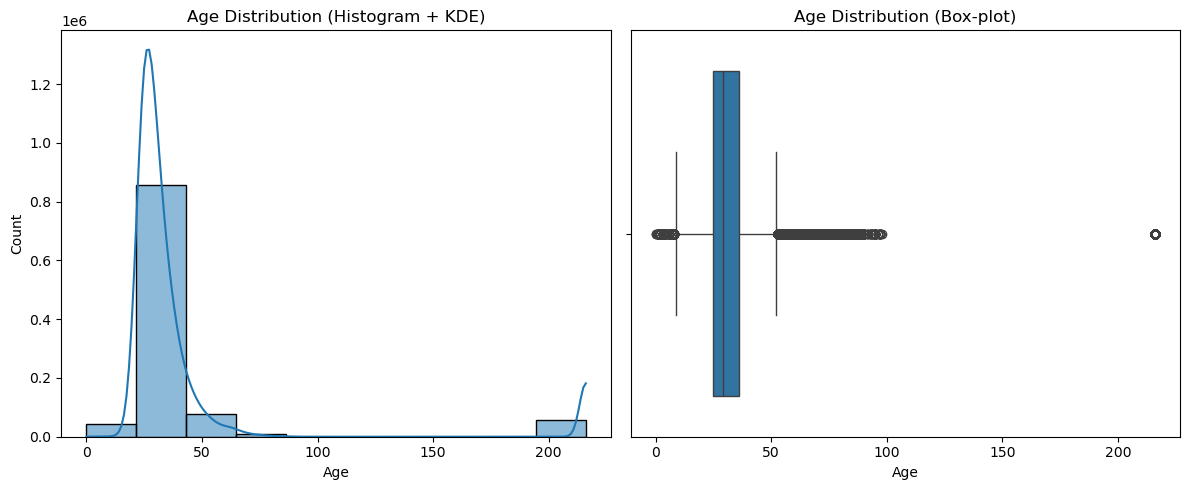

In [19]:
# Plotting Age Distribution
plt.figure(figsize=(12,5))

# 1) Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution (Histogram + KDE)")
plt.xlabel("Age")
plt.ylabel("Count")

# 2) Box-plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title("Age Distribution (Box-plot)")
plt.xlabel("Age")

plt.tight_layout()
plt.show()

### What Is a KDE and How to Interpret the Age Distribution Plot

**KDE (Kernel Density Estimate)**  
A Kernel Density Estimate is a non-parametric way to estimate the probability density function of a continuous variable. In plain terms, it draws a smooth curve that “hugs” the shape of the data, showing you where observations are most concentrated. Unlike a histogram, which bins the data into discrete bars, a KDE:

- **Smooths out noise** by averaging nearby points (controlled by a “bandwidth” parameter).  
- **Reveals multimodality** — you can see if there are multiple “peaks” or clusters in your data.  
- **Makes comparison** between distributions easier when overlaying multiple KDEs.

---

#### Reading the Age Distribution Plot

- **Histogram + KDE (left panel)**  
  - The **bars** show raw counts of customers in each age bucket.  
  - The **blue curve** is the KDE, which smoothly traces those bars and highlights the “shape” of the distribution.  
  - We see a large peak around **30–40 years**, indicating the majority of our customers fall in that bracket.  
  - A long tail of very young (< 20) and very old (100+) values is still visible, suggesting some residual outliers or data artifacts.

- **Box-Plot (right panel)**  
  - The **box** spans the inter-quartile range (IQR, 25th–75th percentile), with the **median** marked inside.  
  - The **whiskers** extend to 1.5 × IQR; points beyond are plotted as individual outliers.  
  - This quickly confirms the central bulk of ages and highlights any remaining extreme values.

---

### Impact on Our RFM Project

1. **Validates Cleaning Steps**  
   - The sharp peak and relatively narrow IQR around 30–40 show our age filter (18–100) captured the core adult population.  
   - Outliers visible in the tail remind us to double-check any remaining DOB parsing issues.

2. **Informs Segmentation Strategy**  
   - Knowing the dominant age group helps tailor our **marketing messages** (e.g. mid-career banking products) and determines how we set age-based RFM segments.

3. **Guides Future Feature Engineering**  
   - If we decide to include **age brackets** (e.g. 18–30, 31–45, 46–60, 60+) as a segmentation feature, the KDE shape suggests where natural cut-points lie.

By combining the histogram and KDE, we gain both a granular and a smoothed view of our customers’ age distribution—crucial context before we dive into RFM scoring and clustering.


In [20]:
df[df["Age"] > 100]["CustomerDOB"].unique()

<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [21]:
def replace_age_outlier(df, cutoff_year=1900):
    """
    Replace any CustomerDOB earlier than cutoff_year with the mean DOB of valid customers,
    then recompute the Age column.
    """
    # Identify DOB outliers
    mask_outliers = df['CustomerDOB'].dt.year < cutoff_year
    
    # Compute the average DOB among the valid rows
    mean_dob = df.loc[~mask_outliers, 'CustomerDOB'].mean()
    
    # Replace outlier DOBs with the mean DOB
    df.loc[mask_outliers, 'CustomerDOB'] = mean_dob
    
    # Recompute Age based on corrected DOB
    today = pd.to_datetime('today')
    df['Age'] = ((today - df['CustomerDOB']).dt.days // 365).astype(int)
    
    return df

# --- Apply the fix & filter again ---
df = replace_age_outlier(df, cutoff_year=1900)

# Drop any remaining unrealistic ages
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)].reset_index(drop=True)

# Quick check
print("Data shape after outlier fix:", df.shape)
print("Age range:", df['Age'].min(), "to", df['Age'].max())

Data shape after outlier fix: (1041421, 11)
Age range: 18 to 100


In [22]:
# Compute counts and percentages for each gender
gender_counts = df['CustGender'].value_counts()
gender_percent = df['CustGender'].value_counts(normalize=True) * 100

# Assemble into a single DataFrame
gender_dist = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percent.round(1)
})

# Display the result
gender_dist

,Count,Percentage
CustGender,,
M,760820,73.1
F,280600,26.9
T,1,0.0


In [23]:
df["CustGender"] = df["CustGender"].replace({'T': 'M'})

In [24]:
df['CustGender'].value_counts()

CustGender
M    760821
F    280600
Name: count, dtype: int64

#### Cleaning the `CustGender` Column

We observed one anomalous entry (`'T'`) in the `CustGender` column. To standardize our data, we'll replace any `'T'` values with `'M'`.

##### Location

In [25]:
# Display the top customer locations by transaction count
df['CustLocation'].value_counts()

CustLocation
MUMBAI                             101984
NEW DELHI                           84106
BANGALORE                           81330
GURGAON                             73588
DELHI                               70529
                                    ...  
CLEAR WATER                             1
ZUNHEBOTO                               1
NEELAM RESTURANT MUMBAI                 0
SANPADA THANE NAVI MUMBAI               0
LANE GANDHI NGR BORING RD PATNA         0
Name: count, Length: 9275, dtype: int64

##### Account Balance

In [26]:
df["CustAccountBalance"].sort_values(ascending = True)

888922            0.0
223475            0.0
291169            0.0
663508            0.0
823417            0.0
             ...     
995143    115035495.1
995916    115035495.1
40717     115035495.1
870254    115035495.1
994292    115035495.1
Name: CustAccountBalance, Length: 1041421, dtype: float64

## Geographic Distribution (`CustLocation`)

- **Major metro dominance**  
  The top five locations by transaction count are all large urban centres (e.g. Mumbai, New Delhi, Bangalore, Gurgaon, Delhi), each contributing tens of thousands of transactions.
- **Long tail of small branches or data quirks**  
  There are over 9 000 unique “locations,” many with very few or even zero recorded transactions—this may indicate rural branches, data-entry inconsistencies, or inactive/placeholder entries.
- **Why it matters**  
  - **Marketing focus**: Prioritize campaigns and product roll-outs in the high-volume regions for maximum ROI.  
  - **Data quality check**: Investigate one-off or zero-transaction locations to clean or consolidate the dataset.

---

## Account Balance Distribution (`CustAccountBalance`)

- **Large proportion of zeros**  
  A significant share of accounts show a balance of ₹0.00—this could represent dormant accounts, newly opened accounts, or default entries.
- **Right-skewed distribution**  
  The mean balance is substantially higher than the median, driven by a handful of very large balances (peaking above ₹100 million).
- **Practical implications**  
  - **Feature engineering**: Use a log transformation or cap extreme balances before modeling to reduce the undue influence of outliers.  
  - **Customer tiering**: Define balance tiers (e.g., zero, low, medium, high) to tailor product bundles, reward programs, and outreach strategies.


##### Transaction Amount

In [27]:
df["TransactionAmount (INR)"].value_counts()

TransactionAmount (INR)
100.00     34176
200.00     31119
50.00      30661
500.00     29031
1000.00    23190
           ...  
2958.72        1
5581.41        1
377.69         1
659.36         1
5259.00        1
Name: count, Length: 92371, dtype: int64

### Transaction Amount Distribution (`TransactionAmount (INR)`)

- **Most common transaction values**  
  The top five amounts by frequency are:  
  1. ₹100  (34 176 occurrences)  
  2. ₹200  (31 119 occurrences)  
  3. ₹50   (30 661 occurrences)  
  4. ₹500  (29 031 occurrences)  
  5. ₹1 000 (23 190 occurrences)

- **Long tail of unique values**  
  There are over 92 000 distinct transaction amounts, many of which occur only once (e.g. ₹2 958.72, ₹5 581.41, ₹377.69, etc.).

- **Frequency‐count summary**  
  When you look at the distribution of how often each unique amount appears, you get:  
  - Total unique amounts: 92 371  
  - Mean count per amount: ~11  
  - Std. dev. of counts: ~256  
  - 25th percentile: 1  
  - 50th percentile (median): 1  
  - 75th percentile: 2  
  - Maximum count for a single amount: 34 176  

- **Why this matters**  
  - **Skewness & outliers**  
    - Most transactions are at a handful of “round” amounts, but there is a heavy right‐hand tail of infrequent, high‐value transactions.  
  - **Preprocessing tips**  
    - Consider a log‐transform or quantile scaling on raw amounts before clustering or modelling to reduce the influence of extreme values.  
    - Create bins (e.g., 0–99, 100–499, 500–999, 1000+) to convert a continuous, highly skewed variable into meaningful categories for segmentation and visualization.  
  - **Business applications**  
    - **Pricing tiers**: Identify which transaction ranges correspond to standard banking products (e.g., micropayments vs. high‐value transfers).  
    - **Anomaly detection**: Outlier amounts may signal errors, fraud, or special promotions that warrant further investigation.


In [28]:
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

820

In [29]:
df.drop(df[df["TransactionAmount (INR)"] == 0].index.tolist(), 
        axis = 0,
        inplace = True
)

## Exploratory Data Analysis (EDA)

In this section, we’ll explore the cleaned dataset to understand key patterns in our customers’ transactions. We’ll cover:

- **Temporal trends**: How do total transactions vary over time?  
- **Age distribution**: What is the age profile of our customers?  
- **Transaction amount**: How are transaction values distributed?  
- **Gender split**: What is the breakdown of transactions by gender?  
- **Top locations**: Which cities contribute the most transactions?  


In [30]:
df["CustomerID"].nunique

<bound method IndexOpsMixin.nunique of 0          C5841053
1          C2142763
2          C4417068
3          C5342380
4          C9031234
             ...   
1041416    C8020229
1041417    C6459278
1041418    C6412354
1041419    C6420483
1041420    C8337524
Name: CustomerID, Length: 1040601, dtype: object>

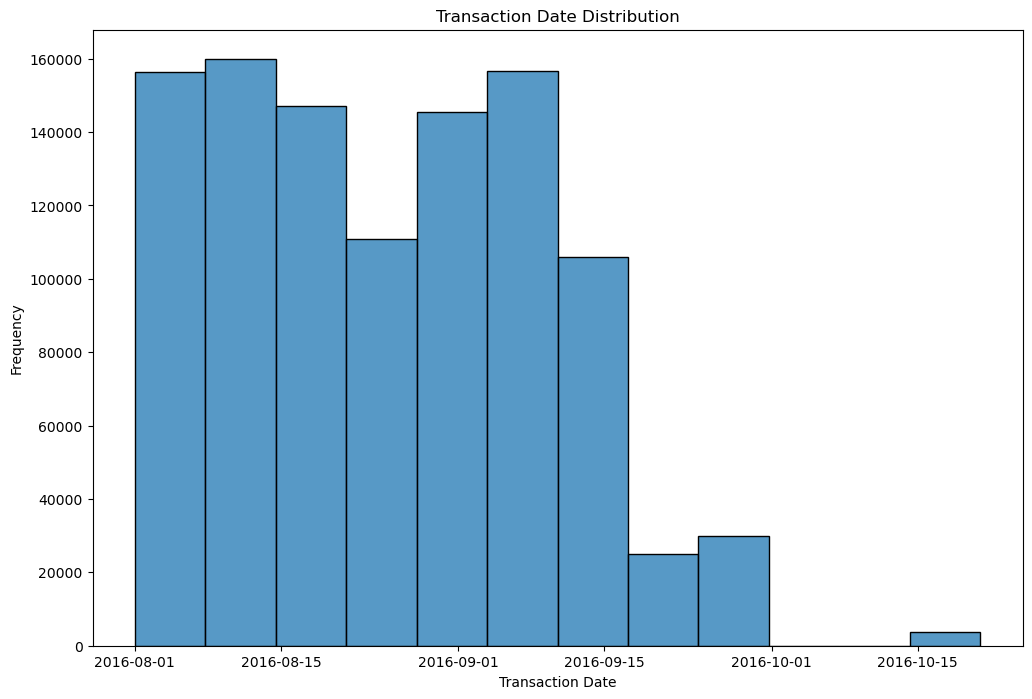

In [31]:
# Plot a distribution for data across the unique transaction date

plt.figure(figsize = (12, 8))
sns.histplot(df["TransactionDate"], bins = 12, kde = False)
plt.xlabel("Transaction Date")
plt.ylabel("Frequency")
plt.title("Transaction Date Distribution")
plt.show()

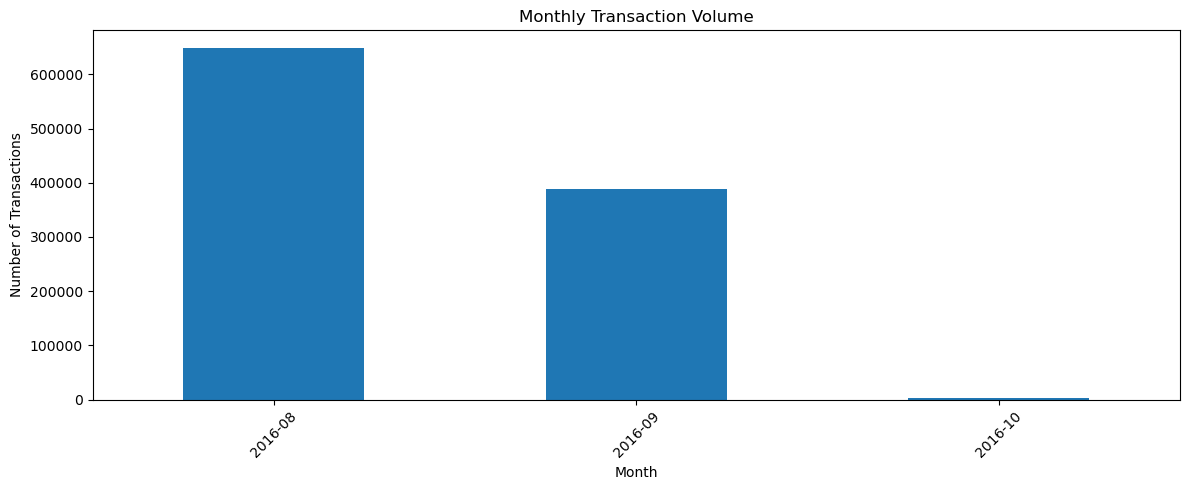

In [32]:
df['Month'] = df['TransactionDateTime'].dt.to_period('M').astype(str)
monthly_counts = df.groupby('Month')['TransactionID'].count()

plt.figure(figsize=(12, 5))
monthly_counts.plot(kind='bar')
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment:**  
We can see clear seasonality and growth trends. Peaks may correspond to festivals or year-end banking activity.  


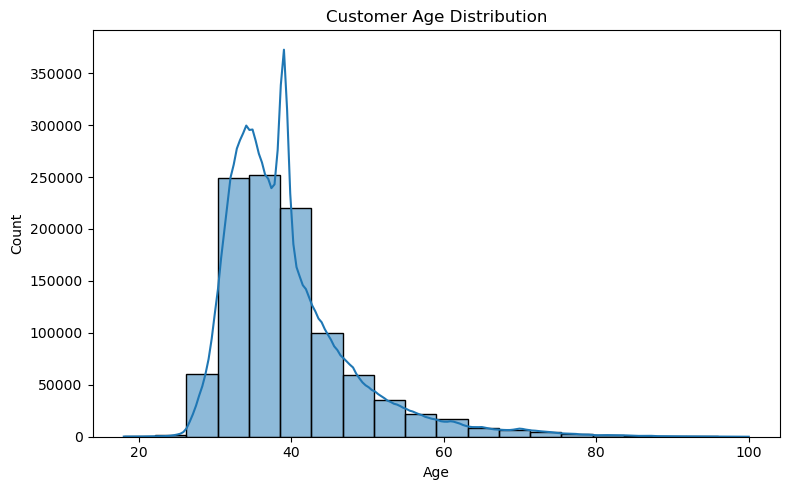

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Comment:**  
Most customers fall between ages 25 and 45. We may want to tailor marketing to this core demographic.  

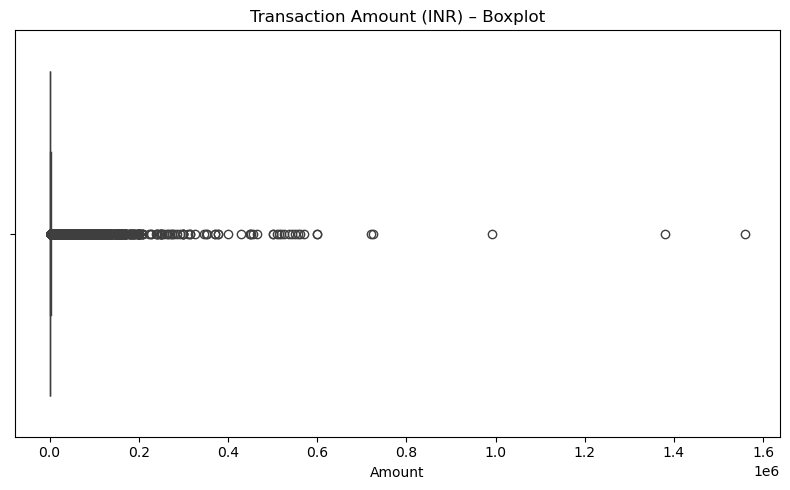

In [34]:
# 3. Transaction amount distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TransactionAmount (INR)'])
plt.title("Transaction Amount (INR) – Boxplot")
plt.xlabel("Amount")
plt.tight_layout()
plt.show()

**Comment:**  
The boxplot highlights extreme outliers (very large transactions). We’ll need to consider whether to cap or transform these values before modeling.  

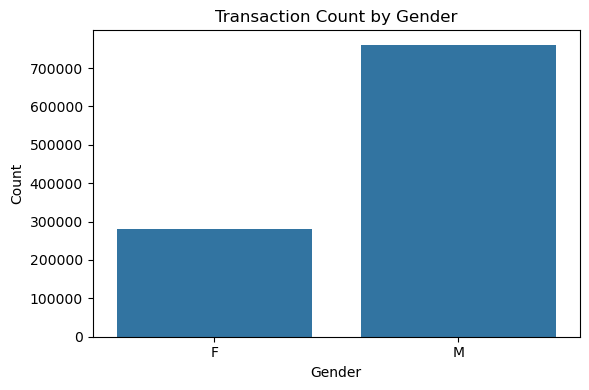

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender', data=df)
plt.title("Transaction Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

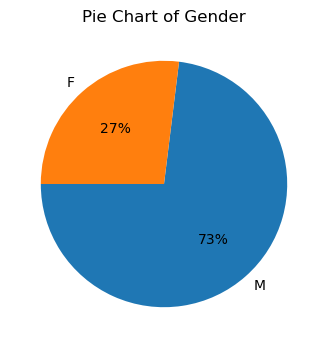

In [36]:
plt.figure(figsize = (6, 4))
gender_count = df["CustGender"].value_counts()
plt.pie(gender_count, labels = gender_count.index, autopct = "%1.f%%", startangle = 180)
plt.title("Pie Chart of Gender")
plt.show()

**Comment:**  
Transactions are heavily skewed toward male customers. We may need to examine whether this reflects marketing outreach or broader customer demographics.  

In [37]:
# top_cities = df['CustLocation'].value_counts().nlargest(10)
# plt.figure(figsize=(10, 5))
# sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
# plt.title("Top 10 Customer Locations")
# plt.xlabel("Number of Transactions")
# plt.ylabel("City")
# plt.tight_layout()
# plt.show()

**Comment:**  
The bulk of our transactions come from the top few metro areas (e.g., Mumbai, New Delhi, Bangalore). Regional campaigns here may yield the highest impact.  

### Next Steps

1. **Feature Engineering**: Build RFM metrics (Recency, Frequency, Monetary) for each customer.  
2. **RFM Scoring**: Assign quintile‐based scores and create RFM segments.  
3. **Clustering**: Use K-Means (or other algorithms) on scaled RFM features to identify natural customer clusters.  
4. **Interpretation & Action**: Translate each segment/cluster into targeted marketing or retention strategies.  

## RFM Analysis

RFM (Recency, Frequency, Monetary) segmentation helps us understand and group customers based on:

- **Recency**: How recently a customer made their last transaction  
- **Frequency**: How often they transact  
- **Monetary**: How much they spend

## Recency

**Recency** measures the number of days since a customer’s last transaction, relative to a fixed reference date (e.g. the most recent transaction in our dataset).  
In a banking context, customers with low Recency (i.e. who have transacted very recently) are typically more engaged and valuable.

Below, we compute the Recency score for each customer.

In [38]:
# Reference date: most recent transaction in the dataset
reference_date = df['TransactionDateTime'].max()

In [39]:
# Compute Recency for each CustomerID
recency = (
    df
    .groupby('CustomerID')
    .agg(Recency=('TransactionDateTime', lambda x: (reference_date - x.max()).days +1))
    .reset_index()
)

### Frequency

**Frequency** measures how many transactions each customer has made during the observation period.  
- A high Frequency score means the customer visits or transacts often, indicating loyalty or strong engagement.  
- Banks can use this to identify “power users” who might be receptive to loyalty programs or upsell/cross-sell opportunities.  
- In other industries (e-commerce, subscription services, etc.), Frequency helps spot your regulars vs. one-time buyers.

Below, we count the number of transactions per customer to compute the Frequency metric.

In [40]:
# Compute Frequency for each CustomerID
frequency = (
    df
    .groupby('CustomerID')['TransactionID']
    .count()
    .reset_index(name='Frequency')
)


### Monetary

**Monetary** represents the total amount of money a customer has spent during the observation period.  
- It identifies your highest-value customers—the ones contributing the most to your revenue.  
- Banks can use this to recognize prime depositors or loan customers and offer them premium services (e.g., priority support, better interest rates).  
- In retail, you’d target top spenders with loyalty tiers or exclusive promotions; in SaaS, it’s the total contract value per customer.

Below, we sum each customer’s transaction amounts to compute their Monetary score.

In [41]:
# Compute Monetary value per customer
monetary = (
    df
    .groupby('CustomerID')['TransactionAmount (INR)']
    .sum()
    .reset_index(name='Monetary')
)

### 5. RFM Table

- **Recency**: Number of days since the customer’s last transaction (lower ⇒ more recent).
- **Frequency**: Total count of transactions in the observation window (higher ⇒ more engaged).
- **Monetary**: Sum of all transaction amounts for each customer (higher ⇒ more valuable).

With these raw RFM metrics computed, our next step is to bin each dimension into scores (typically 1–4) so that we can combine them into an overall RFM score and segment customers accordingly.

In [42]:
rfm_table = (
    pd.concat([recency, frequency, monetary], axis=1)
      .reset_index()
)

In [43]:
# Inspect the result
rfm_table.head()

,index,CustomerID,Recency,CustomerID,Frequency,CustomerID,Monetary
0,0,C1010011,26,C1010011,2,C1010011,5106.0
1,1,C1010012,69,C1010012,1,C1010012,1499.0
2,2,C1010014,76,C1010014,2,C1010014,1455.0
3,3,C1010018,37,C1010018,1,C1010018,30.0
4,4,C1010024,65,C1010024,1,C1010024,5000.0


In [44]:
rfm_table = rfm_table.rename({"TransactionDate":"Recency", "TransactionID":"Frequency", "TransactionAmount":"Monetary"})

## RFM Scoring & Customer Segmentation

Now that we have each customer’s Recency, Frequency and Monetary values, the next step is to turn these into **scores** (typically 1–4) and then combine them into an overall **RFM score**.  

- **Recency Score (R):** We want the most recent customers to have the highest score. Since smaller Recency = more recent, we invert the quartile labels:  
  - *Quartile 1* (longest ago) → R = 1  
  - *Quartile 4* (most recent) → R = 4  
- **Frequency Score (F):** Customers who transact more often get a higher score (F = 1–4).  
- **Monetary Score (M):** Customers who spend more total money get a higher score (M = 1–4).  

We then concatenate or sum these to create a single RFM score for easy segmentation.  


### Quick Peekl at the RFM Table

Display the first 5 rows to confirm the columns and see some sample values:

```python
rfm_table.head()

In [45]:
print("Number of customers in RFM: ", rfm_table.shape[0])

Number of customers in RFM:  878618


#### Descriptive Statistics
Inspect mean, quartiles, min/max and spread for each RFM variable:

In [46]:
rfm_table[['Recency','Frequency','Monetary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,878618.0,56.269283,15.227418,1.00,44.0,56.0,69.0,82.00
Frequency,878618.0,1.184361,0.448761,1.00,1.0,1.0,1.0,6.00
Monetary,878618.0,1855.994493,7190.695431,0.01,200.0,534.0,1500.0,1560034.99


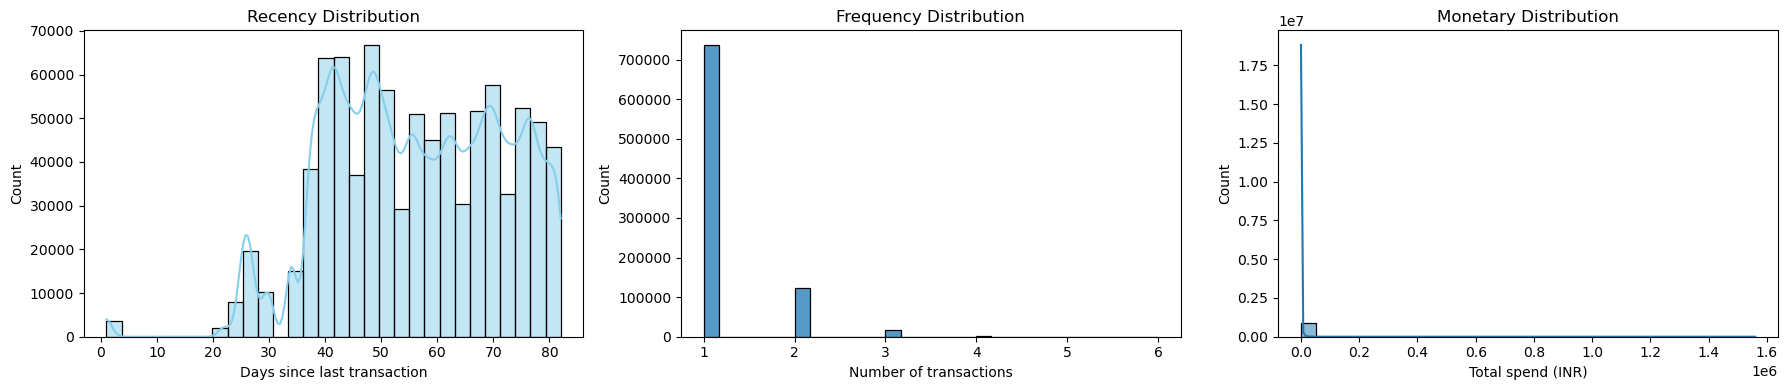

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(rfm_table['Recency'], color = "skyblue", edgecolor = "black", bins=30, kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days since last transaction')

sns.histplot(rfm_table['Frequency'], bins=30, ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of transactions')

sns.histplot(rfm_table['Monetary'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total spend (INR)')

plt.tight_layout()
plt.show()

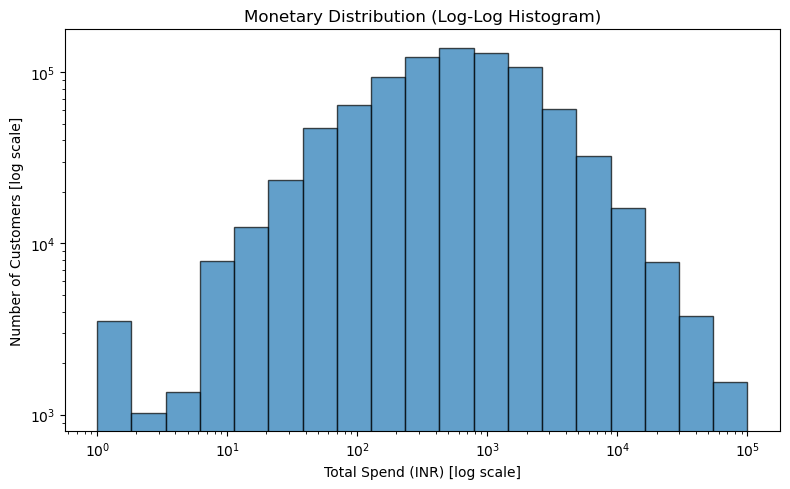

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Log‐spaced bins from 10^0 to 10^5
bins = np.logspace(0, 5, 20)

plt.hist(
    rfm_table['Monetary'],
    bins=bins,
    edgecolor='k',
    alpha=0.7
)

plt.xscale('log')
plt.yscale('log')

plt.title('Monetary Distribution (Log‐Log Histogram)')
plt.xlabel('Total Spend (INR) [log scale]')
plt.ylabel('Number of Customers [log scale]')
plt.tight_layout()
plt.show()

### Assign RFM Score

In [49]:
rfm_table.head()

,index,CustomerID,Recency,CustomerID,Frequency,CustomerID,Monetary
0,0,C1010011,26,C1010011,2,C1010011,5106.0
1,1,C1010012,69,C1010012,1,C1010012,1499.0
2,2,C1010014,76,C1010014,2,C1010014,1455.0
3,3,C1010018,37,C1010018,1,C1010018,30.0
4,4,C1010024,65,C1010024,1,C1010024,5000.0


## Assigning RFM Scores

To convert the raw Recency, Frequency, and Monetary values into comparable scores, we:

1. **Recency (R_Score)**: Use quartiles so that customers with the lowest recency (most recent activity) get the highest score (4), and those who haven’t transacted recently get the lowest score (1).
2. **Frequency (F_Score)**: Define custom bins reflecting how often most customers transact, labeling low-frequency customers with 1 and high-frequency customers with 4.
3. **Monetary (M_Score)**: Use quartiles again so that the top spenders receive a score of 4 and the lowest spenders a score of 1.

Finally, we concatenate these three scores into:
- **RFM_Segment**: A string like “432” which encodes R=4, F=3, M=2
- **RFM_Score**: The numeric sum of R_Score + F_Score + M_Score (ranges from 3 to 12)


In [50]:
# calculate the quartile for each column
quantiles = rfm_table[['Recency','Frequency','Monetary']] \
                   .quantile([0.25, 0.5, 0.75]) \
                   .to_dict()

In [51]:
quantiles

{'Recency': {0.25: 44.0, 0.5: 56.0, 0.75: 69.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [52]:
rfm_table["Frequency"].value_counts()

Frequency
1    736882
2    123470
3     16454
4      1657
5       141
6        14
Name: count, dtype: int64

##### Assign R, F and M Scores

We’ll use the quartiles we calculated (`quantiles`) to assign a score of 1–4 for each RFM metric:

- **Recency (R)**: lower recency (more recent) → higher score  
- **Frequency (F)**: higher frequency → higher score  
- **Monetary (M)**: higher monetary value → higher score 

In [53]:
# RFM quartiles (make sure these names match your columns exactly)
quantiles = rfm_table[['Recency','Frequency','Monetary']].quantile([0.25,0.5,0.75]).to_dict()

def assign_R_score(x, feature):
    """Recency: lower is better, so smallest 25% → 4, next → 3, next → 2, highest 25% → 1."""
    if x <= quantiles[feature][0.25]:
        return 4
    elif x <= quantiles[feature][0.50]:
        return 3
    elif x <= quantiles[feature][0.75]:
        return 2
    else:
        return 1

def assign_F_score(x, feature):
    """Frequency: higher is better, so smallest 25% → 1, next → 2, next → 3, highest 25% → 4."""
    if x <= quantiles[feature][0.25]:
        return 1
    elif x <= quantiles[feature][0.50]:
        return 2
    elif x <= quantiles[feature][0.75]:
        return 3
    else:
        return 4

def assign_M_score(x, feature):
    """Monetary: higher is better, same logic as Frequency."""
    if x <= quantiles[feature][0.25]:
        return 1
    elif x <= quantiles[feature][0.50]:
        return 2
    elif x <= quantiles[feature][0.75]:
        return 3
    else:
        return 4

# Apply the scoring functions
rfm_table['R_Score'] = rfm_table['Recency'].apply(lambda x: assign_R_score(x, 'Recency'))
rfm_table['F_Score'] = rfm_table['Frequency'].apply(lambda x: assign_F_score(x, 'Frequency'))
rfm_table['M_Score'] = rfm_table['Monetary'].apply(lambda x: assign_M_score(x, 'Monetary'))

# Combine into a single RFM score and segment label
rfm_table['RFM_Score'] = rfm_table[['R_Score','F_Score','M_Score']].sum(axis=1)
rfm_table['RFM_Segment'] = (
    rfm_table['R_Score'].astype(str) +
    rfm_table['F_Score'].astype(str) +
    rfm_table['M_Score'].astype(str)
)

# Quick look
rfm_table.head()

,index,CustomerID,Recency,CustomerID,Frequency,CustomerID,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
0,0,C1010011,26,C1010011,2,C1010011,5106.0,4,4,4,12,444
1,1,C1010012,69,C1010012,1,C1010012,1499.0,2,1,3,6,213
2,2,C1010014,76,C1010014,2,C1010014,1455.0,1,4,3,8,143
3,3,C1010018,37,C1010018,1,C1010018,30.0,4,1,1,6,411
4,4,C1010024,65,C1010024,1,C1010024,5000.0,2,1,4,7,214


#### Exploring the RFM Table

Now that we have our complete RFM table, let’s take a closer look at the distributions of Recency, Frequency and Monetary to understand our customer base:

1. **Check the overall size**  
   We should confirm how many unique customers made it into our RFM analysis.

2. **Summary statistics**  
   A quick `.describe()` will show means, quartiles and ranges for each metric.

3. **Visualize each distribution**  
   – Recency: How many days since last purchase?  
   – Frequency: How many transactions per customer?  
   – Monetary: How much has each customer spent in total?

Use histograms (and a log‐scale for monetary if needed) to spot skew, outliers and typical customer behavior.


In [54]:
# Overall size
print("Number of customers in RFM: ", rfm_table.shape[0])

Number of customers in RFM:  878618


In [55]:
# Summary statistics
print(rfm_table[['Recency','Frequency','Monetary']].describe())

             Recency      Frequency      Monetary
count  878618.000000  878618.000000  8.786180e+05
mean       56.269283       1.184361  1.855994e+03
std        15.227418       0.448761  7.190695e+03
min         1.000000       1.000000  1.000000e-02
25%        44.000000       1.000000  2.000000e+02
50%        56.000000       1.000000  5.340000e+02
75%        69.000000       1.000000  1.500000e+03
max        82.000000       6.000000  1.560035e+06


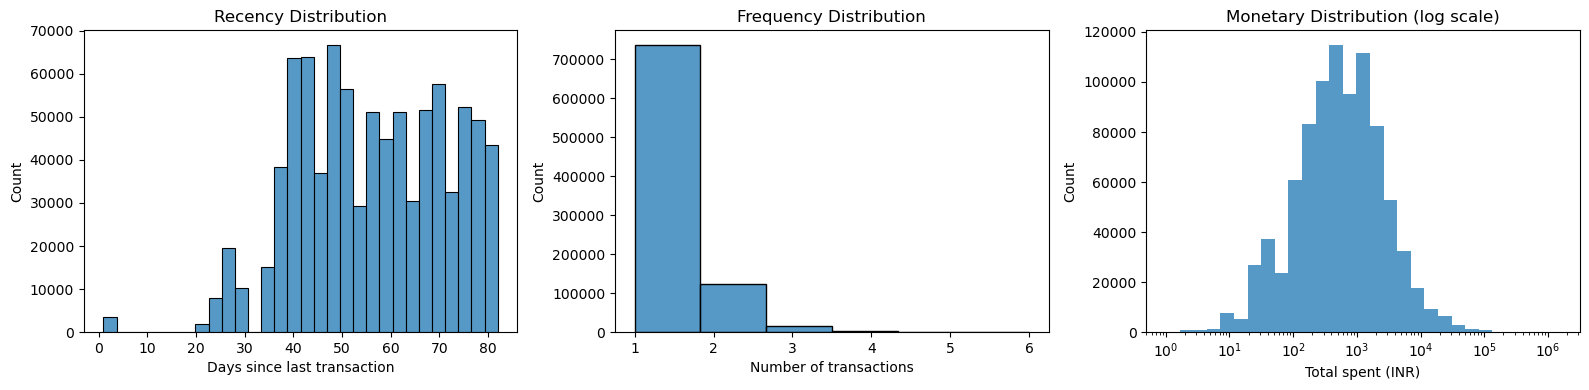

In [56]:
# Histograms of each metric
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(rfm_table['Recency'], bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days since last transaction')

plt.subplot(1,3,2)
sns.histplot(rfm_table['Frequency'], bins=rfm_table['Frequency'].nunique(), kde=False)
plt.title('Frequency Distribution')
plt.xlabel('Number of transactions')

plt.subplot(1,3,3)
# Monetary often right‐skewed, so use log bins
bins = np.logspace(np.log10(rfm_table['Monetary'].min()+1),
                   np.log10(rfm_table['Monetary'].max()), 30)
sns.histplot(rfm_table['Monetary'], bins=bins, kde=False)
plt.xscale('log')
plt.title('Monetary Distribution (log scale)')
plt.xlabel('Total spent (INR)')

plt.tight_layout()
plt.show()

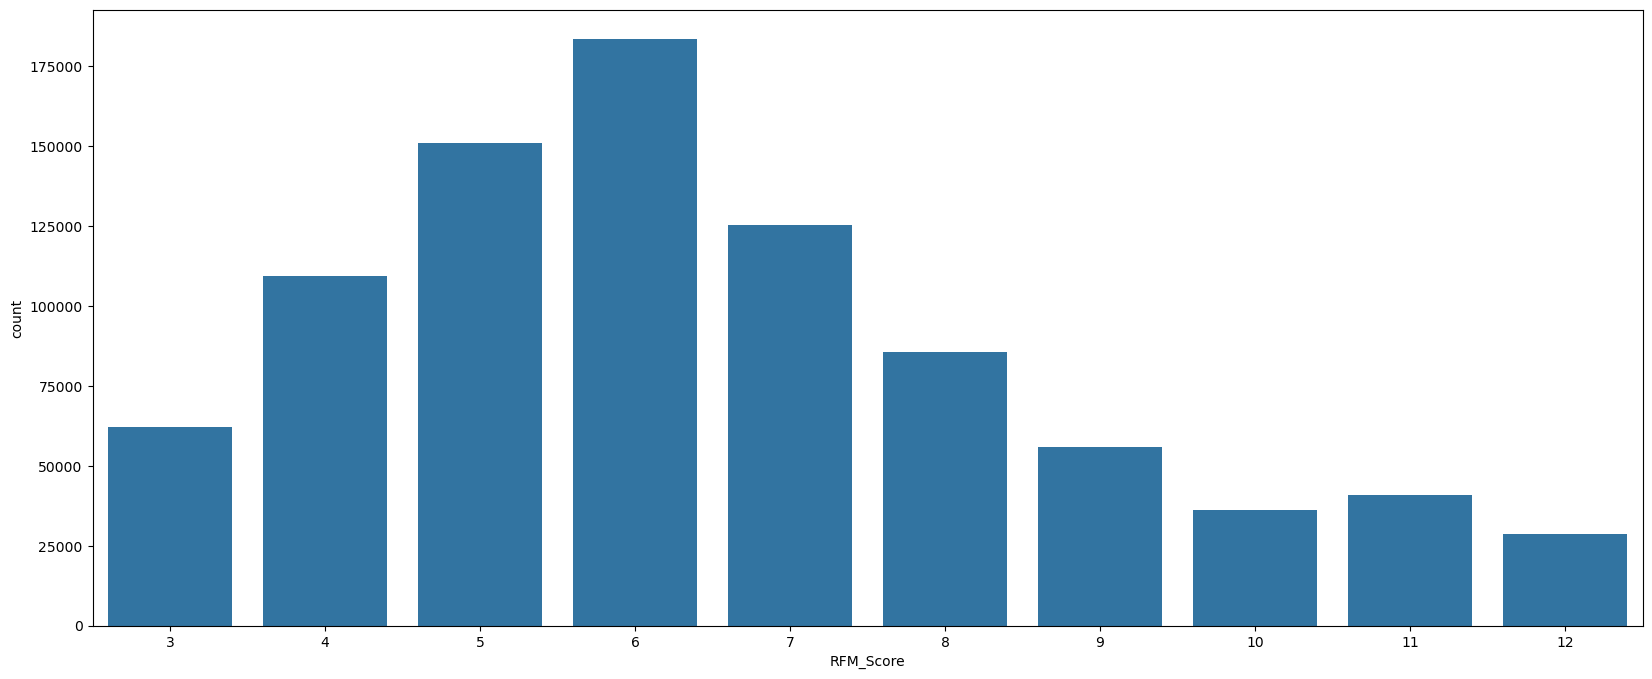

In [57]:
# visualize RFM Score
plt.figure(figsize = (20, 8))
sns.countplot(x = rfm_table["RFM_Score"])
plt.show()

In [58]:
def assign_segments(x):
    """
    Assign a simple segment label based on the RFM_Score:
      • Low:    RFM_Score ≤ 5
      • Medium: 6 ≤ RFM_Score ≤ 9
      • High:   RFM_Score  > 9
    """
    if x >= 9:
        return "Best Customers"
    elif x >= 6:
        return "Loyal Customers"
    elif x >= 4:
        return "At Risk"
    else:
        return "Churned"

In [100]:
output = pd.read_csv("../output/RFM_segmented_customers.csv")

In [101]:
output.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment,Weighted Score,Weighted Segment,Cluster
0,C1010011,26,2,5106.0,4,4,4,12,444,16,High,1
1,C1010012,69,1,1499.0,2,1,3,6,213,8,Medium,0
2,C1010014,76,2,1455.0,1,4,3,8,143,9,Medium,1
3,C1010018,37,1,30.0,4,1,1,6,411,10,Medium,2
4,C1010024,65,1,5000.0,2,1,4,7,214,9,Medium,0


In [61]:
rfm = rfm_table.copy()
rfm['Segment'] = rfm['RFM_Score'].apply(assign_segments)
print(rfm['Segment'].value_counts())

Segment
Loyal Customers    394533
At Risk            260619
Best Customers     161408
Churned             62058
Name: count, dtype: int64


In [62]:
# Apply to your RFM dataframe
rfm['Segment'] = rfm['RFM_Score'].apply(assign_segments)

# Check the distribution
print(rfm['Segment'].value_counts())

Segment
Loyal Customers    394533
At Risk            260619
Best Customers     161408
Churned             62058
Name: count, dtype: int64


## RFM Score Ranges & Interpretation

### Individual R, F, M Scores (1–4)

Each metric is binned into quartiles and scored from **1** (worst) to **4** (best):

| Score | Recency                                    | Frequency                                         | Monetary                                         |
|:-----:|--------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **4** | **Most recent** – customer transacted very recently (top 25%)     | **Most frequent** – in the top 25% by transaction count | **Highest spenders** – total spend in the top 25%    |
| **3** | Next 25% most recent                       | Next 25% most frequent                            | Next 25% highest spenders                        |
| **2** | Next 25%                                   | Next 25%                                          | Next 25%                                         |
| **1** | **Least recent** – hasn’t transacted in longest time (bottom 25%) | **Least frequent** – bottom 25% by transaction count | **Lowest spenders** – bottom 25% by total spend      |

> **Why quartiles?**  
> They give a balanced view of your top, middle and bottom performers on each dimension.

---

### Combined RFM Score & Customer Segments (Low / Medium / High)

We sum the three scores to get a single “health” metric:

| RFM_Score Range | Segment  | Count    | Interpretation                        | Suggested Action                           |
|:---------------:|:---------|:---------|:-------------------------------------|:-------------------------------------------|
| **3 – 5**       | **Low**   | 322,677  | Low engagement & value               | Run win-back campaigns, surveys to recover |
| **6 – 9**       | **Medium**| 450,367  | Moderate engagement & spending       | Offer loyalty incentives, cross-sells      |
| **10 – 12**     | **High**  | 105,574  | Top-tier, most valuable customers    | VIP treatment: exclusive offers, events    |

> **Why sum?**  
> The total RFM score captures overall customer “health.”  
> - **Low**: at risk of churn ⇒ re-engage now  
> - **Medium**: solid but can be upgraded ⇒ nurture relationship  
> - **High**: brand advocates ⇒ reward & deepen loyalty  


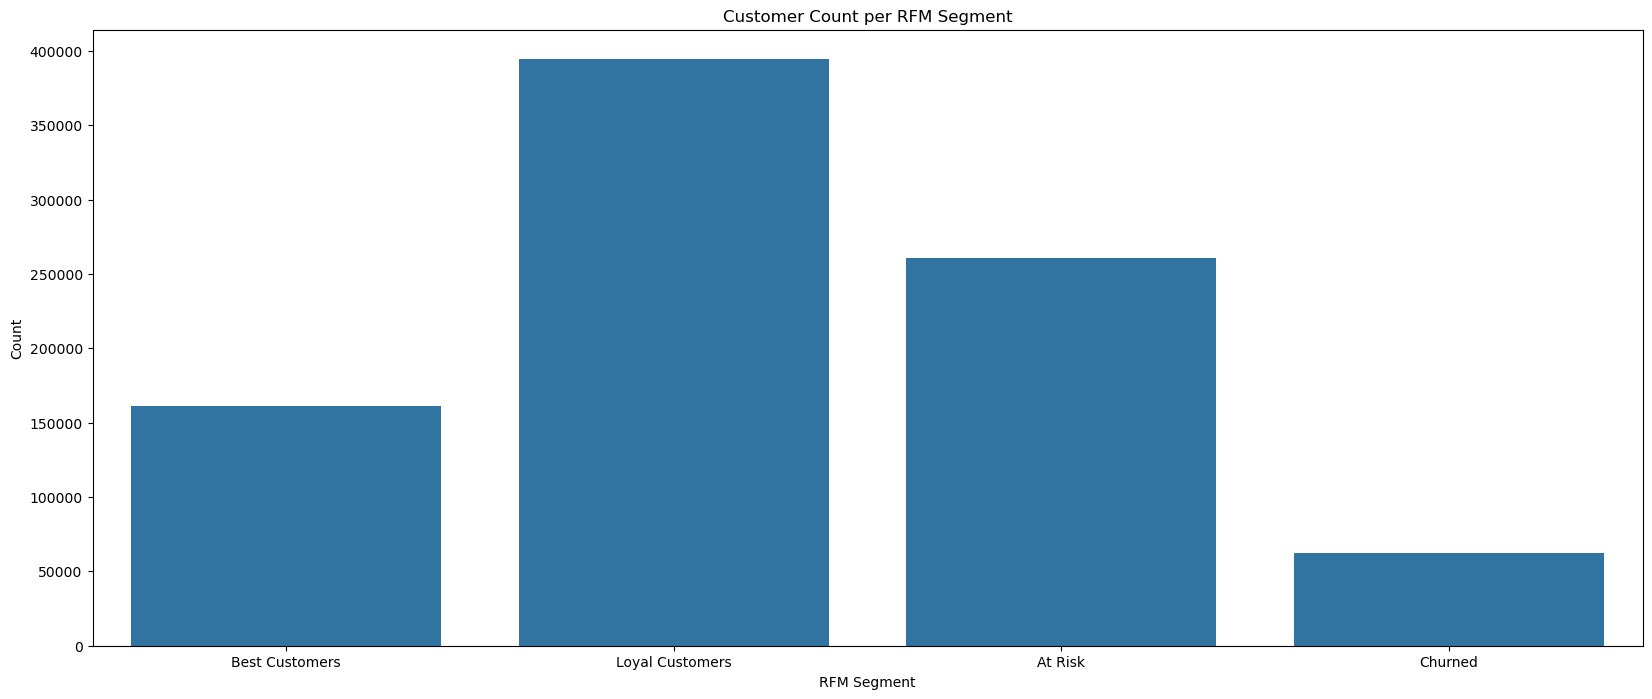

In [63]:
plt.figure(figsize = (20, 8))
sns.countplot(x = rfm["Segment"])
plt.title("Customer Count per RFM Segment")
plt.xlabel("RFM Segment")
plt.ylabel("Count")
plt.show()

#### Create Weighted RFM Score

In [64]:
#    Recency has weight 2; Frequency and Monetary both weight 1
rfm_table["Weighted Score"] = (
    rfm_table["R_Score"] * 2
    + rfm_table["F_Score"] * 1
    + rfm_table["M_Score"] * 1
)

In [65]:
rfm_table["Weighted Segment"] = rfm_table["Weighted Score"].apply(
    lambda x: "High" if x >= 12
              else ("Medium" if x >= 8 else "Low")
)

In [66]:
# Inspect the result
print(rfm_table[["R_Score","F_Score","M_Score","Weighted Score","Weighted Segment"]].head())
print(rfm_table["Weighted Segment"].value_counts())

   R_Score  F_Score  M_Score  Weighted Score Weighted Segment
0        4        4        4              16             High
1        2        1        3               8           Medium
2        1        4        3               9           Medium
3        4        1        1              10           Medium
4        2        1        4               9           Medium
Weighted Segment
Medium    382547
Low       309628
High      186443
Name: count, dtype: int64


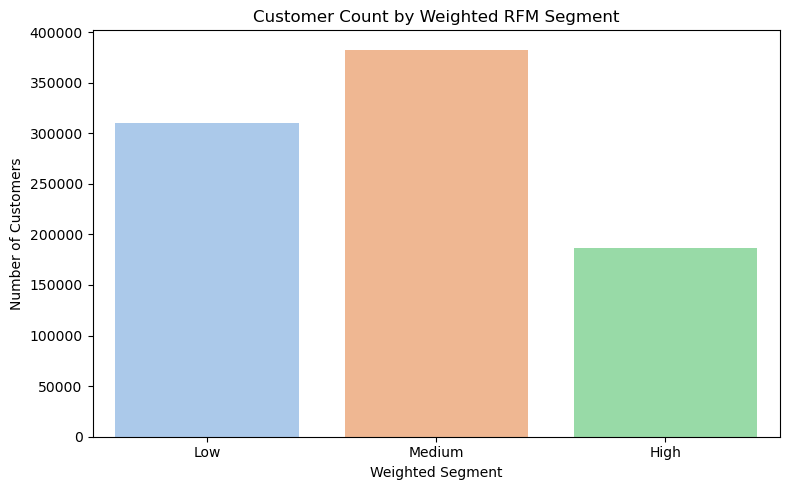

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    data=rfm_table,
    x="Weighted Segment",
    order=["Low", "Medium", "High"],
    palette="pastel"
)
plt.title("Customer Count by Weighted RFM Segment")
plt.xlabel("Weighted Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


#### K-Means Clustering on RFM Features

In [68]:
# pip install yellowbrick

In [69]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Yellowbrick elbow visualizer
from yellowbrick.cluster import KElbowVisualizer


##### Create dataframe for clustering algorithm

In [70]:
# Drop duplicate and unneeded columns
rfm_table = rfm_table.loc[:, ~rfm_table.columns.duplicated()]  # Remove duplicated columns
rfm_table = rfm_table.drop(columns=['index'], errors='ignore')  # Drop 'index' if it exists

# Confirm the new structure
print(rfm_table.columns.tolist())


['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment', 'Weighted Score', 'Weighted Segment']


In [71]:
print(rfm_table.columns.tolist())

['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment', 'Weighted Score', 'Weighted Segment']


#### Scaling the RFM Data

Before performing clustering (such as KMeans), it’s essential to scale the dataset to ensure all features contribute equally to the distance calculations. This is particularly important for algorithms like KMeans which are distance-based.

In our case, we'll use `StandardScaler` from `sklearn.preprocessing` to normalize the `Recency`, `Frequency`, and `Monetary` columns in the RFM dataset.

In [72]:
rfm_data = rfm_table[['Recency', 'Frequency', 'Monetary']]

In [73]:
# Initialize the scaler
scaler = StandardScaler()

In [74]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [75]:
rfm_scaled

array([[-1.98781564,  1.81753571,  0.451974  ],
       [ 0.83603956, -0.41082265, -0.04964676],
       [ 1.29573692,  1.81753571, -0.05576578],
       ...,
       [ 0.57335535, -0.41082265, -0.24058806],
       [-0.08335516, -0.41082265, -0.25115728],
       [-1.98781564, -0.41082265, -0.13920699]])

##### K-Means Clustering: Finding Optimal Number of Clusters

To segment our customers meaningfully, we apply the **K-Means clustering algorithm**. But first, we need to determine the optimal number of clusters (`k`). One popular method for doing this is the **Elbow Method**, which uses the **distortion** metric.

##### What is Distortion?
Distortion (also called inertia) measures how tightly the data points in a cluster are grouped around the centroids. The smaller the distortion, the more compact the clusters.

###### Elbow Rule
We calculate the distortion for a range of cluster values (e.g., 2 to 10) and plot the results. The **"elbow point"** on the graph — where the rate of distortion decrease slows down — indicates the optimal number of clusters. Beyond this point, adding more clusters provides diminishing returns.

This technique is implemented using the `KElbowVisualizer` from the `yellowbrick` library.

Once we identify the best `k`, we can segment our customers into distinct behavioral groups based on their RFM scores.

In [76]:
# Initialize base model
model = KMeans(random_state=1)

In [77]:
# Create the Elbow visualizer with distortion metric
plot_model = KElbowVisualizer(
    model, 
    k=(2, 10), 
    metric="distortion", 
    timings=False
)

In [78]:
# Fit the visualizer to the scaled data
plot_model.fit(rfm_scaled)

  File "C:\Users\enoch\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\enoch\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\enoch\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\enoch\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10), timings=False)

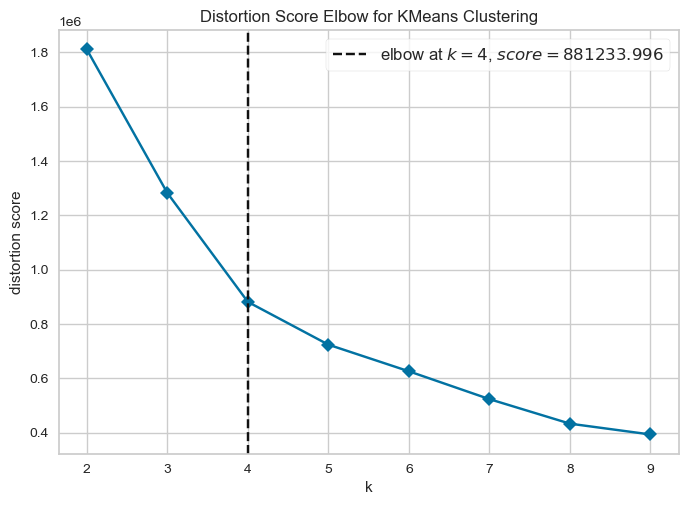

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Show the plot
plot_model.show()

##### K-Means Clustering: Calinski-Harabasz Metric

After exploring the distortion metric using the Elbow method, another effective approach to evaluate clustering performance is the **Calinski-Harabasz Index**.

##### What is the Calinski-Harabasz Index?
Also known as the **Variance Ratio Criterion**, the Calinski-Harabasz (CH) Index measures the ratio of between-cluster dispersion to within-cluster dispersion. 

##### How to Interpret:
- **Higher CH scores** indicate **better-defined clusters**
- Unlike distortion (which we want to minimize), we aim to **maximize** the Calinski-Harabasz score

This metric is useful especially when evaluating cluster structure in **unsupervised learning** contexts like RFM segmentation, where no ground truth labels exist.

We now implement `KElbowVisualizer` again, but this time using the `calinski_harabasz` metric.


In [80]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [81]:
# Instantiate the KMeans model
model = KMeans(random_state=1)

# Use the Calinski-Harabasz metric
visualizer = KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz', timings=False)

In [82]:
# Fit to the scaled RFM data
visualizer.fit(rfm_scaled)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10), metric='calinski_harabasz', timings=False)

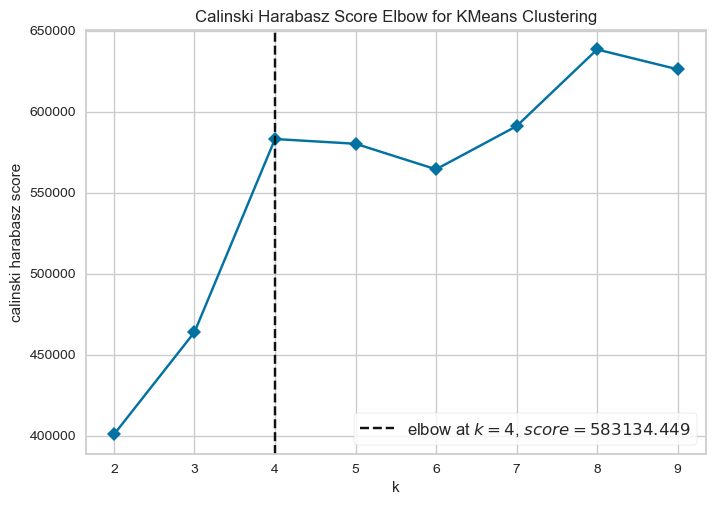

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [83]:
visualizer.show()

##### Cluster Assignment

In [84]:
# Initialize the final KMeans model with 3 clusters
final_model = KMeans(random_state=1, n_clusters=3)

# Fit the model to the scaled RFM data
final_model.fit(rfm_scaled)

# Assign cluster labels to the original RFM table
rfm_table['Cluster'] = final_model.labels_

#### Final Cluster Assignment

After determining the optimal number of clusters using the Elbow Method and Calinski-Harabasz metric, we proceed to build the final KMeans model with `n_clusters=3`. This model segments customers based on their scaled Recency, Frequency, and Monetary values.

Each customer is assigned to one of the three clusters, allowing us to further profile and understand their behavior. These clusters represent distinct customer groups with similar transaction patterns.

This segmentation will serve as the foundation for building targeted marketing strategies and improving overall customer relationship management.

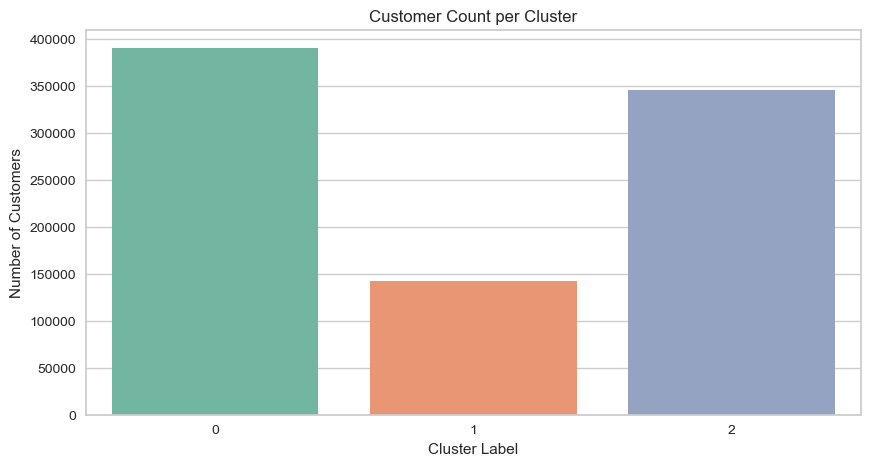

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', data=rfm_table, palette='Set2')
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.show()

In [86]:
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment,Weighted Score,Weighted Segment,Cluster
0,C1010011,26,2,5106.0,4,4,4,12,444,16,High,1
1,C1010012,69,1,1499.0,2,1,3,6,213,8,Medium,0
2,C1010014,76,2,1455.0,1,4,3,8,143,9,Medium,1
3,C1010018,37,1,30.0,4,1,1,6,411,10,Medium,2
4,C1010024,65,1,5000.0,2,1,4,7,214,9,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...
878613,C9099836,76,1,691.0,1,1,3,5,113,6,Low,0
878614,C9099877,37,1,222.0,4,1,2,7,412,11,Medium,2
878615,C9099919,65,1,126.0,2,1,1,4,211,6,Low,0
878616,C9099941,55,1,50.0,3,1,1,5,311,8,Medium,2


In [87]:
# After fitting the model
final_model = KMeans(n_clusters=3, random_state=1)
final_model.fit(rfm_scaled)

# Assign the predicted cluster to a new column
rfm_data["Cluster"] = final_model.labels_


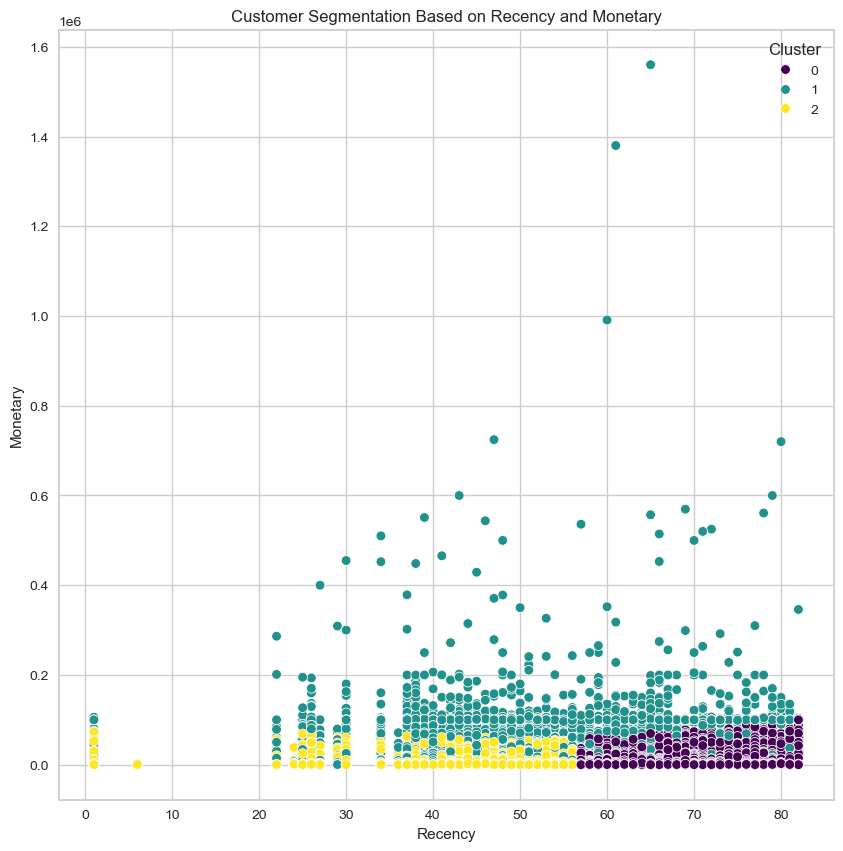

In [88]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=rfm_data,
    x="Recency",
    y="Monetary",
    hue="Cluster",
    palette="viridis"
)
plt.title("Customer Segmentation Based on Recency and Monetary")
plt.show()

#### Cluster Visualization using PCA

To visually interpret the customer clusters formed by KMeans, we use **Principal Component Analysis (PCA)** to reduce the three-dimensional RFM features into two principal components.

The scatterplot below shows how customers are grouped based on their behavioral patterns. Each point represents a customer, and the color indicates the cluster they belong to.

This visualization helps:
- Confirm if the clusters are well-separated
- Identify overlaps or tight groupings
- Understand general cluster shapes and spread

In [89]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

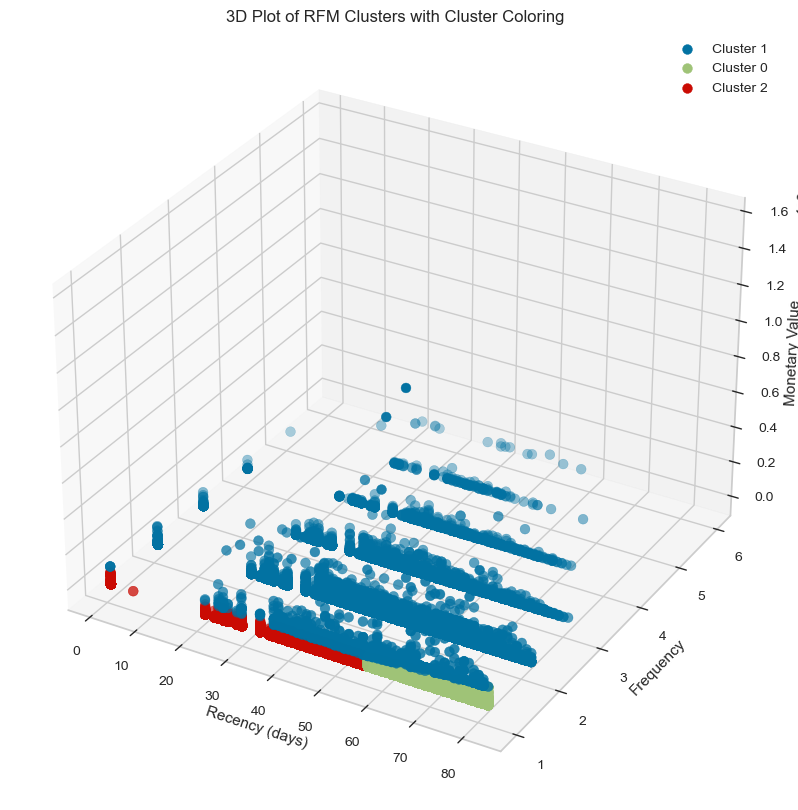

In [90]:
# Define colors for different clusters (extend if more clusters exist)
colors = ['b', 'g', 'r', 'y']

# Plot the RFM data points with different colors for each cluster
for cluster, color in zip(rfm_data["Cluster"].unique(), colors):
    cluster_data = rfm_data[rfm_data["Cluster"] == cluster]
    ax.scatter(
        cluster_data["Recency"], 
        cluster_data["Frequency"], 
        cluster_data["Monetary"], 
        c=color, 
        s=50, 
        marker='o', 
        label=f'Cluster {cluster}'
    )

# Set axis labels
ax.set_xlabel('Recency (days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

# Add a legend and title
ax.legend()
plt.title('3D Plot of RFM Clusters with Cluster Coloring')
plt.show()

In [91]:
sns.countplot(x=rfm_data["Cluster"], palette= "viridis")

<Axes: xlabel='Cluster', ylabel='count'>

In [92]:
# To observe descriptive statistics for each cluster
for cluster in rfm_data['Cluster'].unique():
    print(f"\nCluster: {cluster}")
    print(rfm_data[rfm_data['Cluster'] == cluster][['Recency', 'Frequency', 'Monetary']].describe())


Cluster: 1
             Recency      Frequency      Monetary
count  142798.000000  142798.000000  1.427980e+05
mean       48.602081       2.134351  4.186378e+03
std        13.193545       0.401851  1.542530e+04
min         1.000000       1.000000  2.000000e+00
25%        40.000000       2.000000  6.550000e+02
50%        47.000000       2.000000  1.434000e+03
75%        57.000000       2.000000  3.093000e+03
max        82.000000       6.000000  1.560035e+06

Cluster: 0
             Recency  Frequency       Monetary
count  390177.000000   390177.0  390177.000000
mean       69.903564        1.0    1430.449522
std         7.255989        0.0    3946.589612
min        57.000000        1.0       0.010000
25%        64.000000        1.0     165.000000
50%        70.000000        1.0     464.000000
75%        76.000000        1.0    1200.000000
max        82.000000        1.0  100000.000000

Cluster: 2
             Recency  Frequency       Monetary
count  345643.000000   345643.0  345643.0000

In [93]:
cluster_0 = rfm_data[rfm_data["Cluster"] == 0]
cluster_1 = rfm_data[rfm_data["Cluster"] == 1]
cluster_2 = rfm_data[rfm_data["Cluster"] == 2]

In [94]:
print(cluster_0.columns.tolist())

['Recency', 'Frequency', 'Monetary', 'Cluster']


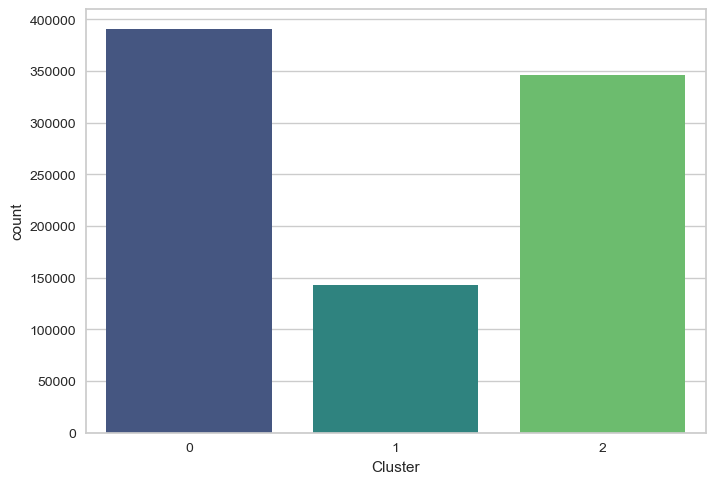

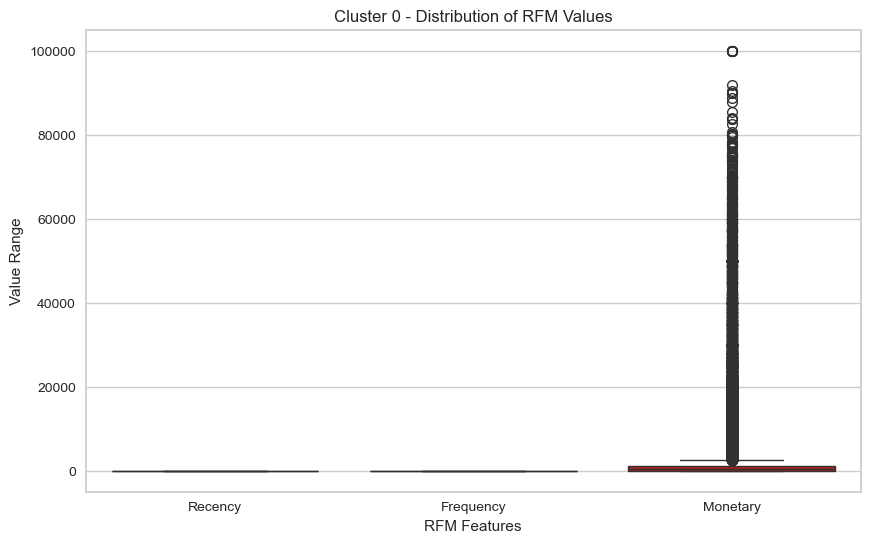

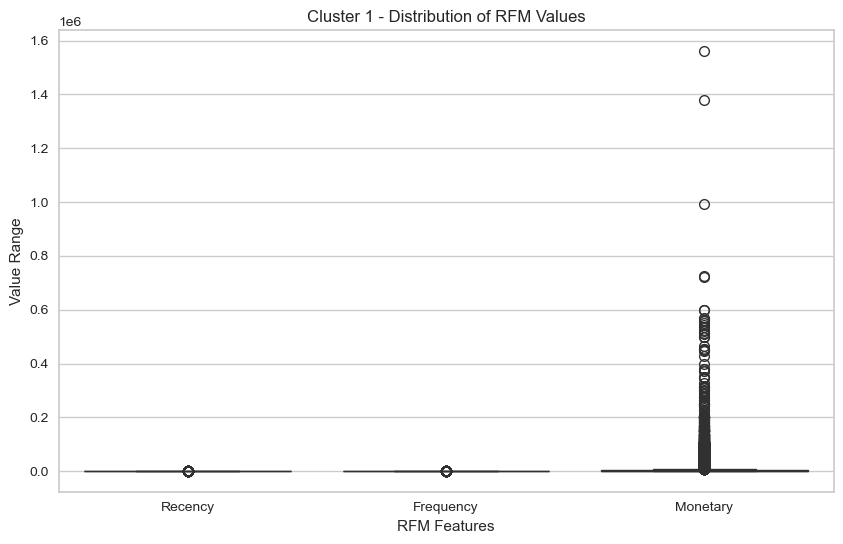

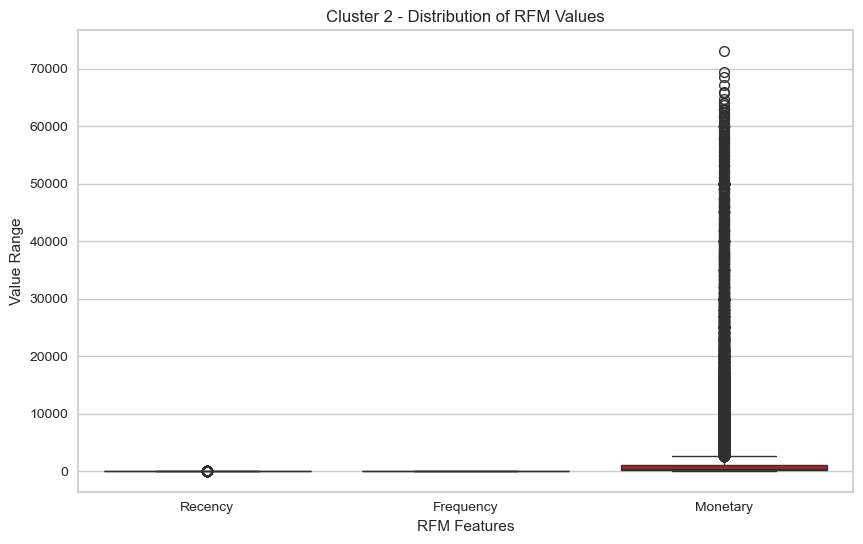

In [95]:
for cluster_num in sorted(rfm_data['Cluster'].unique()):
    cluster_data = rfm_data[rfm_data['Cluster'] == cluster_num]

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cluster_data[['Recency', 'Frequency', 'Monetary']])
    plt.title(f"Cluster {cluster_num} - Distribution of RFM Values")
    plt.ylabel("Value Range")
    plt.xlabel("RFM Features")
    plt.show()

**CLUSTER DESCRIPTION**

- **Cluster 0:**
     - ALL customers in this cluster have **Low Recency score** (1 to 2)
     - All customers have **low frequency score of 1** with a few outliers with 2 F-score
     - 50% of customers have monetary score are between 1 to 2 amd the other 50% has M-score from 2 to 4. The average M-score of this cluster is 2
     - 75% of customers have RFM_score between 4 to 7

- **Cluster 1:**
     - All customers have **very high recency score** between 3 to 4
     - All customers have **low frequency score** of 1
     - 50% of customers have monetary score are between 1 to 2 amd the other 50% has M-score from 2 to 4. The average M-score of this cluster is 2. Same as cluster 0
     - 75% of customers have RFM_score between 6 to 9

- **Cluster 2:**
     - 75% of customers have **high recency score** between 2 to 4 with average value of 3
     - All customers have **fairly high frequency score** of 2 with a few outliers having F-score of 1, 3 and 4
     - Almost all customers have **high monetary score** between 2 and 4 with a few outliers having an M-score of 1
     - 75% of customers have **high RFM score** between 8 to 12 and the remaining 25% have an RFM_score between 5 to 8

Cluster 2 has customers with better all round performance followed by cluster 1 and cluster 0 has customers with poor all round scores.

In [99]:
rfm_table.to_csv("../output/RFM_segmented_customers.csv", index=False)

In [97]:
print(rfm['Segment'].unique())

['Best Customers' 'Loyal Customers' 'At Risk' 'Churned']
